In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install flair==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 34.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8

In [ ]:
!pip install transformers==4.30.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.7 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [ ]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings, FastTextEmbeddings
from typing import List

In [ ]:
# French corpus of 13 texts from ECHR (automatic translations with manual annotations)

columns = {0:'text', 1:'ner'}

corpus_folder = '/content/drive/MyDrive/.../'
corpus : Corpus = ColumnCorpus(corpus_folder, columns,
                                    train_file='FR-manual-MT.tsv', column_delimiter=' ',
                                    dev_file=None,
                                    test_file=None
)

# obtain and print corpus statistics
stats = corpus.obtain_statistics()
print(stats)

2023-11-23 12:50:32,877 Reading data from /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler
2023-11-23 12:50:32,878 Train: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/FR-manual-MT-PER.tsv
2023-11-23 12:50:32,879 Dev: None
2023-11-23 12:50:32,880 Test: None
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 402,
        "number_of_documents_per_class": {
            "CODE": 47,
            "LOC": 97,
            "NATIONALITY": 22,
            "PER": 58,
            "DATE": 208,
            "LEGAL_PROFESSIONAL": 32,
            "QUANTITY": 74,
            "ORG": 28,
            "TIME": 2,
            "CURRENCY": 8,
            "ETHNIC_CATEGORY": 2
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 12241,
            "min": 1,
            "max": 508,
            "avg": 30.450248756218905
        }
    },
    "TEST": {
        "dataset": "TEST",
        "total_number_of_documents":

In [ ]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
new_tag_dictionary = corpus.make_label_dictionary(label_type=tag_type)
print(new_tag_dictionary.idx2item)

2023-11-23 12:51:00,741 Computing label dictionary. Progress:


402it [00:00, 33713.44it/s]

2023-11-23 12:51:00,758 Dictionary created for label 'ner' with 12 values: DATE (seen 208 times), LOC (seen 97 times), QUANTITY (seen 74 times), PER (seen 58 times), CODE (seen 47 times), LEGAL_PROFESSIONAL (seen 32 times), ORG (seen 28 times), NATIONALITY (seen 22 times), CURRENCY (seen 8 times), TIME (seen 2 times), ETHNIC_CATEGORY (seen 2 times)
[b'<unk>', b'DATE', b'LOC', b'QUANTITY', b'PER', b'CODE', b'LEGAL_PROFESSIONAL', b'ORG', b'NATIONALITY', b'CURRENCY', b'TIME', b'ETHNIC_CATEGORY']


In [ ]:
# initialize sequence tagger
from flair.models import SequenceTagger

tagger = SequenceTagger.load("flair/ner-french")

2023-11-23 12:51:06,890 SequenceTagger predicts: Dictionary with 19 tags: O, S-LOC, B-LOC, E-LOC, I-LOC, S-PER, B-PER, E-PER, I-PER, S-MISC, B-MISC, E-MISC, I-MISC, S-ORG, B-ORG, E-ORG, I-ORG, <START>, <STOP>


In [ ]:
new_tagger = SequenceTagger(tagger.embeddings, new_tag_dictionary, tag_type=tag_type)

2023-11-23 12:51:10,624 SequenceTagger predicts: Dictionary with 45 tags: O, S-DATE, B-DATE, E-DATE, I-DATE, S-LOC, B-LOC, E-LOC, I-LOC, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-PER, B-PER, E-PER, I-PER, S-CODE, B-CODE, E-CODE, I-CODE, S-LEGAL_PROFESSIONAL, B-LEGAL_PROFESSIONAL, E-LEGAL_PROFESSIONAL, I-LEGAL_PROFESSIONAL, S-ORG, B-ORG, E-ORG, I-ORG, S-NATIONALITY, B-NATIONALITY, E-NATIONALITY, I-NATIONALITY, S-CURRENCY, B-CURRENCY, E-CURRENCY, I-CURRENCY, S-TIME, B-TIME, E-TIME, I-TIME, S-ETHNIC_CATEGORY, B-ETHNIC_CATEGORY, E-ETHNIC_CATEGORY, I-ETHNIC_CATEGORY


In [ ]:
# initialize trainer
from flair.trainers import ModelTrainer
trainer = ModelTrainer(new_tagger, corpus)

In [ ]:
# train # train_with_dev=True
trainer.train('/content/drive/MyDrive/...',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=25,
              write_weights=True)
# saving the model into your drive (need to provide the full path of the folder in which you want to save the model)

2023-11-23 12:51:16,896 ----------------------------------------------------------------------------------------------------
2023-11-23 12:51:16,897 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      '0-/vol/home-vol2/ml/akbikala/.flair/embeddings/fr-wiki-fasttext-300d-1M'
      (embedding): Embedding(1000000, 300)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(275, 100)
        (rnn): LSTM(100, 1024)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(275, 100)
        (rnn): LSTM(100, 1024)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=2348, out_features=2348, bias=True)
  (rnn): LSTM(2348, 256, batch_first=True, bidirectional=True)
  (linea

100%|██████████| 2/2 [00:00<00:00,  5.23it/s]

2023-11-23 12:51:27,771 Evaluating as a multi-label problem: False
2023-11-23 12:51:27,787 DEV : loss 0.7083228230476379 - f1-score (micro avg)  0.1075
2023-11-23 12:51:27,793 BAD EPOCHS (no improvement): 0
2023-11-23 12:51:27,796 saving best model


2023-11-23 12:51:30,998 ----------------------------------------------------------------------------------------------------
2023-11-23 12:51:31,191 epoch 2 - iter 1/13 - loss 0.81306352 - time (sec): 0.19 - samples/sec: 5162.10 - lr: 0.100000
2023-11-23 12:51:34,428 epoch 2 - iter 2/13 - loss 0.65166261 - time (sec): 3.43 - samples/sec: 615.28 - lr: 0.100000
2023-11-23 12:51:35,782 epoch 2 - iter 3/13 - loss 0.90701923 - time (sec): 4.78 - samples/sec: 749.22 - lr: 0.100000
2023-11-23 12:51:36,448 epoch 2 - iter 4/13 - loss 0.85752599 - time (sec): 5.45 - samples/sec: 823.88 - lr: 0.100000
2023-11-23 12:51:37,069 epoch 2 - iter 5/13 - loss 0.78971854 - time (sec): 6.07 - samples/sec: 911.80 - lr: 0.100000
2023-11-23 12:51:37,713 epoch 2 - iter 6/13 - loss 0.73473685 - time (sec): 6.71 - samples/sec: 967.79 - lr: 0.100000
2023-11-23 12:51:38,309 epoch 2 - iter 7/13 - loss 0.71618265 - time (sec): 7.31 - samples/sec: 987.23 - lr: 0.100000
2023-11-23 12:51:39,012 epoch 2 - iter 8/13 - lo

100%|██████████| 2/2 [00:00<00:00,  5.64it/s]

2023-11-23 12:51:43,495 Evaluating as a multi-label problem: False
2023-11-23 12:51:43,509 DEV : loss 0.4310086667537689 - f1-score (micro avg)  0.3
2023-11-23 12:51:43,516 BAD EPOCHS (no improvement): 0
2023-11-23 12:51:43,520 saving best model


2023-11-23 12:51:47,009 ----------------------------------------------------------------------------------------------------
2023-11-23 12:51:47,189 epoch 3 - iter 1/13 - loss 0.39466211 - time (sec): 0.18 - samples/sec: 5626.18 - lr: 0.100000
2023-11-23 12:51:50,341 epoch 3 - iter 2/13 - loss 0.32186226 - time (sec): 3.33 - samples/sec: 580.33 - lr: 0.100000
2023-11-23 12:51:50,994 epoch 3 - iter 3/13 - loss 0.41616124 - time (sec): 3.98 - samples/sec: 731.77 - lr: 0.100000
2023-11-23 12:51:51,572 epoch 3 - iter 4/13 - loss 0.41441138 - time (sec): 4.56 - samples/sec: 821.82 - lr: 0.100000
2023-11-23 12:51:52,239 epoch 3 - iter 5/13 - loss 0.43866398 - time (sec): 5.23 - samples/sec: 909.04 - lr: 0.100000
2023-11-23 12:51:52,942 epoch 3 - iter 6/13 - loss 0.40570082 - time (sec): 5.93 - samples/sec: 958.57 - lr: 0.100000
2023-11-23 12:51:53,736 epoch 3 - iter 7/13 - loss 0.41608478 - time (sec): 6.72 - samples/sec: 989.05 - lr: 0.100000
2023-11-23 12:51:55,221 epoch 3 - iter 8/13 - lo

100%|██████████| 2/2 [00:00<00:00,  5.26it/s]

2023-11-23 12:51:59,929 Evaluating as a multi-label problem: False
2023-11-23 12:51:59,950 DEV : loss 0.32613158226013184 - f1-score (micro avg)  0.4337
2023-11-23 12:51:59,961 BAD EPOCHS (no improvement): 0
2023-11-23 12:51:59,966 saving best model


2023-11-23 12:52:03,722 ----------------------------------------------------------------------------------------------------
2023-11-23 12:52:03,909 epoch 4 - iter 1/13 - loss 0.39528597 - time (sec): 0.16 - samples/sec: 5484.08 - lr: 0.100000
2023-11-23 12:52:06,999 epoch 4 - iter 2/13 - loss 0.37358458 - time (sec): 3.25 - samples/sec: 525.52 - lr: 0.100000
2023-11-23 12:52:07,595 epoch 4 - iter 3/13 - loss 0.34844313 - time (sec): 3.85 - samples/sec: 694.42 - lr: 0.100000
2023-11-23 12:52:08,231 epoch 4 - iter 4/13 - loss 0.35943488 - time (sec): 4.48 - samples/sec: 849.34 - lr: 0.100000
2023-11-23 12:52:08,892 epoch 4 - iter 5/13 - loss 0.32405874 - time (sec): 5.14 - samples/sec: 919.95 - lr: 0.100000
2023-11-23 12:52:09,540 epoch 4 - iter 6/13 - loss 0.33271284 - time (sec): 5.79 - samples/sec: 982.36 - lr: 0.100000
2023-11-23 12:52:10,186 epoch 4 - iter 7/13 - loss 0.33965563 - time (sec): 6.44 - samples/sec: 1016.65 - lr: 0.100000
2023-11-23 12:52:10,852 epoch 4 - iter 8/13 - l

100%|██████████| 2/2 [00:00<00:00,  6.03it/s]

2023-11-23 12:52:15,549 Evaluating as a multi-label problem: False
2023-11-23 12:52:15,562 DEV : loss 0.25512561202049255 - f1-score (micro avg)  0.5957
2023-11-23 12:52:15,568 BAD EPOCHS (no improvement): 0
2023-11-23 12:52:15,571 saving best model


2023-11-23 12:52:19,364 ----------------------------------------------------------------------------------------------------
2023-11-23 12:52:19,557 epoch 5 - iter 1/13 - loss 0.28278475 - time (sec): 0.19 - samples/sec: 4859.08 - lr: 0.100000
2023-11-23 12:52:22,309 epoch 5 - iter 2/13 - loss 0.31069509 - time (sec): 2.94 - samples/sec: 612.32 - lr: 0.100000
2023-11-23 12:52:22,973 epoch 5 - iter 3/13 - loss 0.28049123 - time (sec): 3.61 - samples/sec: 791.32 - lr: 0.100000
2023-11-23 12:52:23,547 epoch 5 - iter 4/13 - loss 0.27069750 - time (sec): 4.18 - samples/sec: 929.70 - lr: 0.100000
2023-11-23 12:52:24,208 epoch 5 - iter 5/13 - loss 0.28818764 - time (sec): 4.84 - samples/sec: 952.97 - lr: 0.100000
2023-11-23 12:52:24,866 epoch 5 - iter 6/13 - loss 0.28797952 - time (sec): 5.50 - samples/sec: 1016.99 - lr: 0.100000
2023-11-23 12:52:26,200 epoch 5 - iter 7/13 - loss 0.38872718 - time (sec): 6.83 - samples/sec: 1001.35 - lr: 0.100000
2023-11-23 12:52:26,913 epoch 5 - iter 8/13 - 

100%|██████████| 2/2 [00:00<00:00,  5.04it/s]

2023-11-23 12:52:31,425 Evaluating as a multi-label problem: False
2023-11-23 12:52:31,439 DEV : loss 0.24587294459342957 - f1-score (micro avg)  0.5111
2023-11-23 12:52:31,447 BAD EPOCHS (no improvement): 1
2023-11-23 12:52:31,451 ----------------------------------------------------------------------------------------------------


2023-11-23 12:52:31,606 epoch 6 - iter 1/13 - loss 0.18383126 - time (sec): 0.15 - samples/sec: 6245.00 - lr: 0.100000
2023-11-23 12:52:32,249 epoch 6 - iter 2/13 - loss 0.18926637 - time (sec): 0.80 - samples/sec: 2205.45 - lr: 0.100000
2023-11-23 12:52:32,962 epoch 6 - iter 3/13 - loss 0.24646824 - time (sec): 1.51 - samples/sec: 1748.20 - lr: 0.100000
2023-11-23 12:52:33,670 epoch 6 - iter 4/13 - loss 0.26536213 - time (sec): 2.22 - samples/sec: 1592.67 - lr: 0.100000
2023-11-23 12:52:34,382 epoch 6 - iter 5/13 - loss 0.27782726 - time (sec): 2.93 - samples/sec: 1571.62 - lr: 0.100000
2023-11-23 12:52:35,160 epoch 6 - iter 6/13 - loss 0.26374494 - time (sec): 3.71 - samples/sec: 1539.27 - lr: 0.100000
2023-11-23 12:52:35,853 epoch 6 - iter 7/13 - loss 0.26364385 - time (sec): 4.40 - samples/sec: 1461.02 - lr: 0.100000
2023-11-23 12:52:36,512 epoch 6 - iter 8/13 - loss 0.25010409 - time (sec): 5.06 - samples/sec: 1484.28 - lr: 0.100000
2023-11-23 12:52:37,207 epoch 6 - iter 9/13 - lo

100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

2023-11-23 12:52:41,425 Evaluating as a multi-label problem: False
2023-11-23 12:52:41,442 DEV : loss 0.20038874447345734 - f1-score (micro avg)  0.6038
2023-11-23 12:52:41,449 BAD EPOCHS (no improvement): 0
2023-11-23 12:52:41,453 saving best model


2023-11-23 12:52:44,997 ----------------------------------------------------------------------------------------------------
2023-11-23 12:52:45,167 epoch 7 - iter 1/13 - loss 0.14636313 - time (sec): 0.17 - samples/sec: 6125.89 - lr: 0.100000
2023-11-23 12:52:48,365 epoch 7 - iter 2/13 - loss 0.19031658 - time (sec): 3.37 - samples/sec: 574.62 - lr: 0.100000
2023-11-23 12:52:49,032 epoch 7 - iter 3/13 - loss 0.22333668 - time (sec): 4.03 - samples/sec: 758.03 - lr: 0.100000
2023-11-23 12:52:49,661 epoch 7 - iter 4/13 - loss 0.22232319 - time (sec): 4.66 - samples/sec: 871.13 - lr: 0.100000
2023-11-23 12:52:50,272 epoch 7 - iter 5/13 - loss 0.24050269 - time (sec): 5.27 - samples/sec: 938.38 - lr: 0.100000
2023-11-23 12:52:50,852 epoch 7 - iter 6/13 - loss 0.24525476 - time (sec): 5.85 - samples/sec: 991.36 - lr: 0.100000
2023-11-23 12:52:52,095 epoch 7 - iter 7/13 - loss 0.32498601 - time (sec): 7.10 - samples/sec: 1014.23 - lr: 0.100000
2023-11-23 12:52:52,747 epoch 7 - iter 8/13 - l

100%|██████████| 2/2 [00:00<00:00,  5.59it/s]

2023-11-23 12:52:57,047 Evaluating as a multi-label problem: False
2023-11-23 12:52:57,063 DEV : loss 0.1794290840625763 - f1-score (micro avg)  0.5155
2023-11-23 12:52:57,072 BAD EPOCHS (no improvement): 1
2023-11-23 12:52:57,075 ----------------------------------------------------------------------------------------------------


2023-11-23 12:52:57,251 epoch 8 - iter 1/13 - loss 0.15362909 - time (sec): 0.17 - samples/sec: 6140.74 - lr: 0.100000
2023-11-23 12:52:57,959 epoch 8 - iter 2/13 - loss 0.16533468 - time (sec): 0.88 - samples/sec: 2134.09 - lr: 0.100000
2023-11-23 12:52:58,705 epoch 8 - iter 3/13 - loss 0.16910555 - time (sec): 1.63 - samples/sec: 1702.55 - lr: 0.100000
2023-11-23 12:52:59,436 epoch 8 - iter 4/13 - loss 0.19199350 - time (sec): 2.36 - samples/sec: 1641.50 - lr: 0.100000
2023-11-23 12:53:00,116 epoch 8 - iter 5/13 - loss 0.17763946 - time (sec): 3.04 - samples/sec: 1604.81 - lr: 0.100000
2023-11-23 12:53:00,769 epoch 8 - iter 6/13 - loss 0.19535191 - time (sec): 3.69 - samples/sec: 1583.97 - lr: 0.100000
2023-11-23 12:53:01,381 epoch 8 - iter 7/13 - loss 0.20173164 - time (sec): 4.30 - samples/sec: 1510.75 - lr: 0.100000
2023-11-23 12:53:02,040 epoch 8 - iter 8/13 - loss 0.21824973 - time (sec): 4.96 - samples/sec: 1493.24 - lr: 0.100000
2023-11-23 12:53:02,684 epoch 8 - iter 9/13 - lo

100%|██████████| 2/2 [00:00<00:00,  6.32it/s]

2023-11-23 12:53:06,774 Evaluating as a multi-label problem: False
2023-11-23 12:53:06,785 DEV : loss 0.17170877754688263 - f1-score (micro avg)  0.4486
2023-11-23 12:53:06,791 BAD EPOCHS (no improvement): 2
2023-11-23 12:53:06,794 ----------------------------------------------------------------------------------------------------


2023-11-23 12:53:06,980 epoch 9 - iter 1/13 - loss 0.20780365 - time (sec): 0.18 - samples/sec: 5274.14 - lr: 0.100000
2023-11-23 12:53:07,651 epoch 9 - iter 2/13 - loss 0.18358662 - time (sec): 0.85 - samples/sec: 2242.73 - lr: 0.100000
2023-11-23 12:53:08,341 epoch 9 - iter 3/13 - loss 0.18665139 - time (sec): 1.54 - samples/sec: 1852.68 - lr: 0.100000
2023-11-23 12:53:09,003 epoch 9 - iter 4/13 - loss 0.17168393 - time (sec): 2.21 - samples/sec: 1750.60 - lr: 0.100000
2023-11-23 12:53:10,413 epoch 9 - iter 5/13 - loss 0.26830318 - time (sec): 3.62 - samples/sec: 1448.19 - lr: 0.100000
2023-11-23 12:53:11,092 epoch 9 - iter 6/13 - loss 0.25718240 - time (sec): 4.30 - samples/sec: 1414.54 - lr: 0.100000
2023-11-23 12:53:11,725 epoch 9 - iter 7/13 - loss 0.23855246 - time (sec): 4.93 - samples/sec: 1432.48 - lr: 0.100000
2023-11-23 12:53:12,378 epoch 9 - iter 8/13 - loss 0.22038464 - time (sec): 5.58 - samples/sec: 1418.19 - lr: 0.100000
2023-11-23 12:53:13,036 epoch 9 - iter 9/13 - lo

100%|██████████| 2/2 [00:00<00:00,  5.70it/s]

2023-11-23 12:53:16,502 Evaluating as a multi-label problem: False
2023-11-23 12:53:16,514 DEV : loss 0.14517554640769958 - f1-score (micro avg)  0.5149
2023-11-23 12:53:16,520 BAD EPOCHS (no improvement): 3
2023-11-23 12:53:16,523 ----------------------------------------------------------------------------------------------------


2023-11-23 12:53:16,713 epoch 10 - iter 1/13 - loss 0.07193168 - time (sec): 0.19 - samples/sec: 5959.47 - lr: 0.100000
2023-11-23 12:53:17,403 epoch 10 - iter 2/13 - loss 0.13969212 - time (sec): 0.88 - samples/sec: 2442.09 - lr: 0.100000
2023-11-23 12:53:17,993 epoch 10 - iter 3/13 - loss 0.14578697 - time (sec): 1.47 - samples/sec: 2013.20 - lr: 0.100000
2023-11-23 12:53:18,647 epoch 10 - iter 4/13 - loss 0.14853777 - time (sec): 2.12 - samples/sec: 1885.81 - lr: 0.100000
2023-11-23 12:53:19,213 epoch 10 - iter 5/13 - loss 0.14410849 - time (sec): 2.69 - samples/sec: 1787.83 - lr: 0.100000
2023-11-23 12:53:19,863 epoch 10 - iter 6/13 - loss 0.15374817 - time (sec): 3.34 - samples/sec: 1747.84 - lr: 0.100000
2023-11-23 12:53:20,430 epoch 10 - iter 7/13 - loss 0.15193966 - time (sec): 3.90 - samples/sec: 1715.54 - lr: 0.100000
2023-11-23 12:53:21,055 epoch 10 - iter 8/13 - loss 0.15102327 - time (sec): 4.53 - samples/sec: 1656.00 - lr: 0.100000
2023-11-23 12:53:21,662 epoch 10 - iter 

100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

2023-11-23 12:53:25,558 Evaluating as a multi-label problem: False
2023-11-23 12:53:25,570 DEV : loss 0.13374143838882446 - f1-score (micro avg)  0.5283
2023-11-23 12:53:25,577 Epoch    10: reducing learning rate of group 0 to 5.0000e-02.
2023-11-23 12:53:25,579 BAD EPOCHS (no improvement): 4
2023-11-23 12:53:25,583 ----------------------------------------------------------------------------------------------------


2023-11-23 12:53:25,725 epoch 11 - iter 1/13 - loss 0.29442620 - time (sec): 0.14 - samples/sec: 6092.66 - lr: 0.050000
2023-11-23 12:53:26,717 epoch 11 - iter 2/13 - loss 0.20256288 - time (sec): 1.13 - samples/sec: 1686.07 - lr: 0.050000
2023-11-23 12:53:28,033 epoch 11 - iter 3/13 - loss 0.30268986 - time (sec): 2.45 - samples/sec: 1460.21 - lr: 0.050000
2023-11-23 12:53:28,706 epoch 11 - iter 4/13 - loss 0.26573771 - time (sec): 3.12 - samples/sec: 1431.97 - lr: 0.050000
2023-11-23 12:53:29,409 epoch 11 - iter 5/13 - loss 0.24263281 - time (sec): 3.82 - samples/sec: 1423.04 - lr: 0.050000
2023-11-23 12:53:30,012 epoch 11 - iter 6/13 - loss 0.22566145 - time (sec): 4.43 - samples/sec: 1416.57 - lr: 0.050000
2023-11-23 12:53:30,619 epoch 11 - iter 7/13 - loss 0.21280613 - time (sec): 5.03 - samples/sec: 1416.31 - lr: 0.050000
2023-11-23 12:53:31,170 epoch 11 - iter 8/13 - loss 0.20233366 - time (sec): 5.59 - samples/sec: 1410.08 - lr: 0.050000
2023-11-23 12:53:31,843 epoch 11 - iter 

100%|██████████| 2/2 [00:00<00:00,  5.59it/s]

2023-11-23 12:53:35,169 Evaluating as a multi-label problem: False
2023-11-23 12:53:35,182 DEV : loss 0.1269170641899109 - f1-score (micro avg)  0.5905
2023-11-23 12:53:35,189 BAD EPOCHS (no improvement): 1
2023-11-23 12:53:35,192 ----------------------------------------------------------------------------------------------------


2023-11-23 12:53:36,010 epoch 12 - iter 1/13 - loss 0.44867414 - time (sec): 0.82 - samples/sec: 1603.51 - lr: 0.050000
2023-11-23 12:53:36,591 epoch 12 - iter 2/13 - loss 0.31101468 - time (sec): 1.40 - samples/sec: 1535.76 - lr: 0.050000
2023-11-23 12:53:37,260 epoch 12 - iter 3/13 - loss 0.25367092 - time (sec): 2.07 - samples/sec: 1502.04 - lr: 0.050000
2023-11-23 12:53:37,890 epoch 12 - iter 4/13 - loss 0.22066094 - time (sec): 2.70 - samples/sec: 1437.98 - lr: 0.050000
2023-11-23 12:53:38,563 epoch 12 - iter 5/13 - loss 0.21314681 - time (sec): 3.37 - samples/sec: 1491.56 - lr: 0.050000
2023-11-23 12:53:39,235 epoch 12 - iter 6/13 - loss 0.19568609 - time (sec): 4.04 - samples/sec: 1485.19 - lr: 0.050000
2023-11-23 12:53:39,854 epoch 12 - iter 7/13 - loss 0.18266427 - time (sec): 4.66 - samples/sec: 1502.29 - lr: 0.050000
2023-11-23 12:53:40,444 epoch 12 - iter 8/13 - loss 0.17908441 - time (sec): 5.25 - samples/sec: 1517.02 - lr: 0.050000
2023-11-23 12:53:41,110 epoch 12 - iter 

100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

2023-11-23 12:53:44,593 Evaluating as a multi-label problem: False
2023-11-23 12:53:44,604 DEV : loss 0.11772977560758591 - f1-score (micro avg)  0.625
2023-11-23 12:53:44,611 BAD EPOCHS (no improvement): 0
2023-11-23 12:53:44,614 saving best model


2023-11-23 12:53:48,053 ----------------------------------------------------------------------------------------------------
2023-11-23 12:53:48,196 epoch 13 - iter 1/13 - loss 0.15825905 - time (sec): 0.14 - samples/sec: 6450.96 - lr: 0.050000
2023-11-23 12:53:51,423 epoch 13 - iter 2/13 - loss 0.11261063 - time (sec): 3.37 - samples/sec: 543.06 - lr: 0.050000
2023-11-23 12:53:52,692 epoch 13 - iter 3/13 - loss 0.25884938 - time (sec): 4.64 - samples/sec: 698.30 - lr: 0.050000
2023-11-23 12:53:53,373 epoch 13 - iter 4/13 - loss 0.22592416 - time (sec): 5.32 - samples/sec: 804.58 - lr: 0.050000
2023-11-23 12:53:54,023 epoch 13 - iter 5/13 - loss 0.20331635 - time (sec): 5.97 - samples/sec: 884.16 - lr: 0.050000
2023-11-23 12:53:54,656 epoch 13 - iter 6/13 - loss 0.18774136 - time (sec): 6.60 - samples/sec: 943.37 - lr: 0.050000
2023-11-23 12:53:55,334 epoch 13 - iter 7/13 - loss 0.17811569 - time (sec): 7.28 - samples/sec: 979.47 - lr: 0.050000
2023-11-23 12:53:56,063 epoch 13 - iter 8

100%|██████████| 2/2 [00:00<00:00,  5.55it/s]

2023-11-23 12:54:00,475 Evaluating as a multi-label problem: False
2023-11-23 12:54:00,489 DEV : loss 0.10863371193408966 - f1-score (micro avg)  0.6476
2023-11-23 12:54:00,496 BAD EPOCHS (no improvement): 0
2023-11-23 12:54:00,500 saving best model


2023-11-23 12:54:04,699 ----------------------------------------------------------------------------------------------------
2023-11-23 12:54:04,926 epoch 14 - iter 1/13 - loss 0.07356434 - time (sec): 0.20 - samples/sec: 6278.01 - lr: 0.050000
2023-11-23 12:54:06,937 epoch 14 - iter 2/13 - loss 0.08950443 - time (sec): 2.21 - samples/sec: 1024.31 - lr: 0.050000
2023-11-23 12:54:08,204 epoch 14 - iter 3/13 - loss 0.22147073 - time (sec): 3.48 - samples/sec: 1041.38 - lr: 0.050000
2023-11-23 12:54:08,852 epoch 14 - iter 4/13 - loss 0.19301506 - time (sec): 4.13 - samples/sec: 1099.79 - lr: 0.050000
2023-11-23 12:54:09,440 epoch 14 - iter 5/13 - loss 0.18737072 - time (sec): 4.71 - samples/sec: 1160.18 - lr: 0.050000
2023-11-23 12:54:09,995 epoch 14 - iter 6/13 - loss 0.17712098 - time (sec): 5.27 - samples/sec: 1157.62 - lr: 0.050000
2023-11-23 12:54:10,722 epoch 14 - iter 7/13 - loss 0.17110936 - time (sec): 6.00 - samples/sec: 1195.06 - lr: 0.050000
2023-11-23 12:54:11,831 epoch 14 - 

100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

2023-11-23 12:54:16,196 Evaluating as a multi-label problem: False
2023-11-23 12:54:16,207 DEV : loss 0.10975664108991623 - f1-score (micro avg)  0.6604
2023-11-23 12:54:16,214 BAD EPOCHS (no improvement): 0
2023-11-23 12:54:16,218 saving best model


2023-11-23 12:54:19,886 ----------------------------------------------------------------------------------------------------
2023-11-23 12:54:20,080 epoch 15 - iter 1/13 - loss 0.16084641 - time (sec): 0.19 - samples/sec: 6209.13 - lr: 0.050000
2023-11-23 12:54:23,106 epoch 15 - iter 2/13 - loss 0.13053879 - time (sec): 3.22 - samples/sec: 635.24 - lr: 0.050000
2023-11-23 12:54:23,706 epoch 15 - iter 3/13 - loss 0.11295616 - time (sec): 3.82 - samples/sec: 783.05 - lr: 0.050000
2023-11-23 12:54:24,361 epoch 15 - iter 4/13 - loss 0.12183881 - time (sec): 4.47 - samples/sec: 902.62 - lr: 0.050000
2023-11-23 12:54:24,981 epoch 15 - iter 5/13 - loss 0.12009962 - time (sec): 5.09 - samples/sec: 955.10 - lr: 0.050000
2023-11-23 12:54:26,350 epoch 15 - iter 6/13 - loss 0.19102111 - time (sec): 6.46 - samples/sec: 956.93 - lr: 0.050000
2023-11-23 12:54:27,056 epoch 15 - iter 7/13 - loss 0.18363840 - time (sec): 7.17 - samples/sec: 1002.24 - lr: 0.050000
2023-11-23 12:54:27,734 epoch 15 - iter 

100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

2023-11-23 12:54:32,028 Evaluating as a multi-label problem: False
2023-11-23 12:54:32,039 DEV : loss 0.09958931803703308 - f1-score (micro avg)  0.7339
2023-11-23 12:54:32,045 BAD EPOCHS (no improvement): 0
2023-11-23 12:54:32,048 saving best model


2023-11-23 12:54:38,375 ----------------------------------------------------------------------------------------------------
2023-11-23 12:54:38,555 epoch 16 - iter 1/13 - loss 0.07376405 - time (sec): 0.15 - samples/sec: 5830.27 - lr: 0.050000
2023-11-23 12:54:39,190 epoch 16 - iter 2/13 - loss 0.07994903 - time (sec): 0.79 - samples/sec: 2515.84 - lr: 0.050000
2023-11-23 12:54:39,851 epoch 16 - iter 3/13 - loss 0.10970481 - time (sec): 1.45 - samples/sec: 1990.43 - lr: 0.050000
2023-11-23 12:54:40,508 epoch 16 - iter 4/13 - loss 0.11672366 - time (sec): 2.11 - samples/sec: 1849.44 - lr: 0.050000
2023-11-23 12:54:41,118 epoch 16 - iter 5/13 - loss 0.10769138 - time (sec): 2.72 - samples/sec: 1708.69 - lr: 0.050000
2023-11-23 12:54:42,520 epoch 16 - iter 6/13 - loss 0.16311813 - time (sec): 4.12 - samples/sec: 1499.18 - lr: 0.050000
2023-11-23 12:54:43,255 epoch 16 - iter 7/13 - loss 0.15932759 - time (sec): 4.85 - samples/sec: 1467.54 - lr: 0.050000
2023-11-23 12:54:43,920 epoch 16 - 

100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

2023-11-23 12:54:48,201 Evaluating as a multi-label problem: False
2023-11-23 12:54:48,212 DEV : loss 0.09877879917621613 - f1-score (micro avg)  0.6964
2023-11-23 12:54:48,218 BAD EPOCHS (no improvement): 1
2023-11-23 12:54:48,221 ----------------------------------------------------------------------------------------------------


2023-11-23 12:54:48,389 epoch 17 - iter 1/13 - loss 0.10905359 - time (sec): 0.17 - samples/sec: 5688.78 - lr: 0.050000
2023-11-23 12:54:49,054 epoch 17 - iter 2/13 - loss 0.09188810 - time (sec): 0.83 - samples/sec: 2444.40 - lr: 0.050000
2023-11-23 12:54:49,732 epoch 17 - iter 3/13 - loss 0.09069414 - time (sec): 1.51 - samples/sec: 1871.04 - lr: 0.050000
2023-11-23 12:54:50,393 epoch 17 - iter 4/13 - loss 0.10028029 - time (sec): 2.17 - samples/sec: 1713.33 - lr: 0.050000
2023-11-23 12:54:51,130 epoch 17 - iter 5/13 - loss 0.12250692 - time (sec): 2.91 - samples/sec: 1722.09 - lr: 0.050000
2023-11-23 12:54:51,809 epoch 17 - iter 6/13 - loss 0.12502474 - time (sec): 3.59 - samples/sec: 1617.49 - lr: 0.050000
2023-11-23 12:54:53,132 epoch 17 - iter 7/13 - loss 0.16798411 - time (sec): 4.91 - samples/sec: 1476.46 - lr: 0.050000
2023-11-23 12:54:53,816 epoch 17 - iter 8/13 - loss 0.15998515 - time (sec): 5.59 - samples/sec: 1441.79 - lr: 0.050000
2023-11-23 12:54:54,456 epoch 17 - iter 

100%|██████████| 2/2 [00:00<00:00,  5.88it/s]

2023-11-23 12:54:57,838 Evaluating as a multi-label problem: False
2023-11-23 12:54:57,850 DEV : loss 0.09472328424453735 - f1-score (micro avg)  0.7327
2023-11-23 12:54:57,857 BAD EPOCHS (no improvement): 2
2023-11-23 12:54:57,861 ----------------------------------------------------------------------------------------------------


2023-11-23 12:54:58,038 epoch 18 - iter 1/13 - loss 0.10223360 - time (sec): 0.18 - samples/sec: 4883.19 - lr: 0.050000
2023-11-23 12:54:58,714 epoch 18 - iter 2/13 - loss 0.07043822 - time (sec): 0.85 - samples/sec: 2042.01 - lr: 0.050000
2023-11-23 12:54:59,378 epoch 18 - iter 3/13 - loss 0.07563126 - time (sec): 1.52 - samples/sec: 1754.24 - lr: 0.050000
2023-11-23 12:55:00,025 epoch 18 - iter 4/13 - loss 0.08763970 - time (sec): 2.16 - samples/sec: 1580.08 - lr: 0.050000
2023-11-23 12:55:00,657 epoch 18 - iter 5/13 - loss 0.08985959 - time (sec): 2.79 - samples/sec: 1522.29 - lr: 0.050000
2023-11-23 12:55:01,321 epoch 18 - iter 6/13 - loss 0.09223056 - time (sec): 3.46 - samples/sec: 1540.73 - lr: 0.050000
2023-11-23 12:55:01,988 epoch 18 - iter 7/13 - loss 0.09172379 - time (sec): 4.13 - samples/sec: 1521.90 - lr: 0.050000
2023-11-23 12:55:02,600 epoch 18 - iter 8/13 - loss 0.09425602 - time (sec): 4.74 - samples/sec: 1527.93 - lr: 0.050000
2023-11-23 12:55:03,819 epoch 18 - iter 

100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

2023-11-23 12:55:07,217 Evaluating as a multi-label problem: False
2023-11-23 12:55:07,229 DEV : loss 0.09739475697278976 - f1-score (micro avg)  0.729
2023-11-23 12:55:07,235 BAD EPOCHS (no improvement): 3
2023-11-23 12:55:07,239 ----------------------------------------------------------------------------------------------------


2023-11-23 12:55:07,352 epoch 19 - iter 1/13 - loss 0.05484055 - time (sec): 0.11 - samples/sec: 7669.08 - lr: 0.050000
2023-11-23 12:55:08,059 epoch 19 - iter 2/13 - loss 0.09115115 - time (sec): 0.82 - samples/sec: 2170.79 - lr: 0.050000
2023-11-23 12:55:08,673 epoch 19 - iter 3/13 - loss 0.08090142 - time (sec): 1.43 - samples/sec: 1868.36 - lr: 0.050000
2023-11-23 12:55:09,284 epoch 19 - iter 4/13 - loss 0.08308598 - time (sec): 2.04 - samples/sec: 1772.52 - lr: 0.050000
2023-11-23 12:55:09,913 epoch 19 - iter 5/13 - loss 0.08221314 - time (sec): 2.67 - samples/sec: 1630.16 - lr: 0.050000
2023-11-23 12:55:11,224 epoch 19 - iter 6/13 - loss 0.17087101 - time (sec): 3.98 - samples/sec: 1461.33 - lr: 0.050000
2023-11-23 12:55:11,887 epoch 19 - iter 7/13 - loss 0.15668743 - time (sec): 4.65 - samples/sec: 1485.77 - lr: 0.050000
2023-11-23 12:55:12,570 epoch 19 - iter 8/13 - loss 0.15458623 - time (sec): 5.33 - samples/sec: 1500.38 - lr: 0.050000
2023-11-23 12:55:13,181 epoch 19 - iter 

100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

2023-11-23 12:55:16,598 Evaluating as a multi-label problem: False
2023-11-23 12:55:16,611 DEV : loss 0.08660782873630524 - f1-score (micro avg)  0.7706
2023-11-23 12:55:16,618 BAD EPOCHS (no improvement): 0
2023-11-23 12:55:16,623 saving best model


2023-11-23 12:55:20,579 ----------------------------------------------------------------------------------------------------
2023-11-23 12:55:20,736 epoch 20 - iter 1/13 - loss 0.03287211 - time (sec): 0.15 - samples/sec: 5359.60 - lr: 0.050000
2023-11-23 12:55:23,227 epoch 20 - iter 2/13 - loss 0.05705804 - time (sec): 2.65 - samples/sec: 617.06 - lr: 0.050000
2023-11-23 12:55:24,566 epoch 20 - iter 3/13 - loss 0.18611430 - time (sec): 3.99 - samples/sec: 749.28 - lr: 0.050000
2023-11-23 12:55:25,163 epoch 20 - iter 4/13 - loss 0.16386032 - time (sec): 4.58 - samples/sec: 855.99 - lr: 0.050000
2023-11-23 12:55:25,815 epoch 20 - iter 5/13 - loss 0.14357911 - time (sec): 5.23 - samples/sec: 932.07 - lr: 0.050000
2023-11-23 12:55:26,538 epoch 20 - iter 6/13 - loss 0.12957883 - time (sec): 5.96 - samples/sec: 997.19 - lr: 0.050000
2023-11-23 12:55:27,199 epoch 20 - iter 7/13 - loss 0.11943220 - time (sec): 6.62 - samples/sec: 1025.81 - lr: 0.050000
2023-11-23 12:55:27,861 epoch 20 - iter 

100%|██████████| 2/2 [00:00<00:00,  5.68it/s]

2023-11-23 12:55:32,489 Evaluating as a multi-label problem: False
2023-11-23 12:55:32,501 DEV : loss 0.08286722749471664 - f1-score (micro avg)  0.7706
2023-11-23 12:55:32,508 BAD EPOCHS (no improvement): 0
2023-11-23 12:55:32,512 ----------------------------------------------------------------------------------------------------


2023-11-23 12:55:32,682 epoch 21 - iter 1/13 - loss 0.05277982 - time (sec): 0.17 - samples/sec: 5209.35 - lr: 0.050000
2023-11-23 12:55:33,384 epoch 21 - iter 2/13 - loss 0.08076131 - time (sec): 0.87 - samples/sec: 2184.66 - lr: 0.050000
2023-11-23 12:55:34,080 epoch 21 - iter 3/13 - loss 0.07363485 - time (sec): 1.57 - samples/sec: 1892.94 - lr: 0.050000
2023-11-23 12:55:34,760 epoch 21 - iter 4/13 - loss 0.07406440 - time (sec): 2.25 - samples/sec: 1722.69 - lr: 0.050000
2023-11-23 12:55:35,497 epoch 21 - iter 5/13 - loss 0.08156045 - time (sec): 2.98 - samples/sec: 1590.90 - lr: 0.050000
2023-11-23 12:55:36,190 epoch 21 - iter 6/13 - loss 0.08155110 - time (sec): 3.68 - samples/sec: 1536.03 - lr: 0.050000
2023-11-23 12:55:36,894 epoch 21 - iter 7/13 - loss 0.07527632 - time (sec): 4.38 - samples/sec: 1499.54 - lr: 0.050000
2023-11-23 12:55:37,595 epoch 21 - iter 8/13 - loss 0.09199779 - time (sec): 5.08 - samples/sec: 1488.23 - lr: 0.050000
2023-11-23 12:55:38,263 epoch 21 - iter 

100%|██████████| 2/2 [00:00<00:00,  5.41it/s]

2023-11-23 12:55:42,607 Evaluating as a multi-label problem: False
2023-11-23 12:55:42,621 DEV : loss 0.08450004458427429 - f1-score (micro avg)  0.8077
2023-11-23 12:55:42,628 BAD EPOCHS (no improvement): 0
2023-11-23 12:55:42,632 saving best model


2023-11-23 12:55:46,399 ----------------------------------------------------------------------------------------------------
2023-11-23 12:55:46,583 epoch 22 - iter 1/13 - loss 0.09629635 - time (sec): 0.18 - samples/sec: 5469.04 - lr: 0.050000
2023-11-23 12:55:49,693 epoch 22 - iter 2/13 - loss 0.09359038 - time (sec): 3.29 - samples/sec: 581.92 - lr: 0.050000
2023-11-23 12:55:50,309 epoch 22 - iter 3/13 - loss 0.09600991 - time (sec): 3.91 - samples/sec: 720.29 - lr: 0.050000
2023-11-23 12:55:51,348 epoch 22 - iter 4/13 - loss 0.11787199 - time (sec): 4.95 - samples/sec: 788.84 - lr: 0.050000
2023-11-23 12:55:51,986 epoch 22 - iter 5/13 - loss 0.11173572 - time (sec): 5.58 - samples/sec: 836.64 - lr: 0.050000
2023-11-23 12:55:52,645 epoch 22 - iter 6/13 - loss 0.10357779 - time (sec): 6.24 - samples/sec: 898.31 - lr: 0.050000
2023-11-23 12:55:53,217 epoch 22 - iter 7/13 - loss 0.09524388 - time (sec): 6.81 - samples/sec: 959.81 - lr: 0.050000
2023-11-23 12:55:53,859 epoch 22 - iter 8

100%|██████████| 2/2 [00:00<00:00,  5.65it/s]

2023-11-23 12:55:58,738 Evaluating as a multi-label problem: False
2023-11-23 12:55:58,752 DEV : loss 0.08004958182573318 - f1-score (micro avg)  0.8224
2023-11-23 12:55:58,759 BAD EPOCHS (no improvement): 0
2023-11-23 12:55:58,762 saving best model


2023-11-23 12:56:02,486 ----------------------------------------------------------------------------------------------------
2023-11-23 12:56:02,665 epoch 23 - iter 1/13 - loss 0.04853420 - time (sec): 0.15 - samples/sec: 6040.19 - lr: 0.050000
2023-11-23 12:56:05,778 epoch 23 - iter 2/13 - loss 0.05874768 - time (sec): 3.26 - samples/sec: 592.68 - lr: 0.050000
2023-11-23 12:56:06,402 epoch 23 - iter 3/13 - loss 0.09399969 - time (sec): 3.89 - samples/sec: 746.22 - lr: 0.050000
2023-11-23 12:56:07,005 epoch 23 - iter 4/13 - loss 0.08664261 - time (sec): 4.49 - samples/sec: 895.42 - lr: 0.050000
2023-11-23 12:56:08,247 epoch 23 - iter 5/13 - loss 0.14854287 - time (sec): 5.73 - samples/sec: 942.22 - lr: 0.050000
2023-11-23 12:56:09,003 epoch 23 - iter 6/13 - loss 0.14409793 - time (sec): 6.49 - samples/sec: 992.52 - lr: 0.050000
2023-11-23 12:56:09,705 epoch 23 - iter 7/13 - loss 0.13253462 - time (sec): 7.19 - samples/sec: 1005.16 - lr: 0.050000
2023-11-23 12:56:10,409 epoch 23 - iter 

100%|██████████| 2/2 [00:00<00:00,  5.16it/s]

2023-11-23 12:56:14,751 Evaluating as a multi-label problem: False
2023-11-23 12:56:14,764 DEV : loss 0.0814388319849968 - f1-score (micro avg)  0.8544
2023-11-23 12:56:14,770 BAD EPOCHS (no improvement): 0
2023-11-23 12:56:14,786 saving best model


2023-11-23 12:56:18,482 ----------------------------------------------------------------------------------------------------
2023-11-23 12:56:18,642 epoch 24 - iter 1/13 - loss 0.10080909 - time (sec): 0.16 - samples/sec: 5369.10 - lr: 0.050000
2023-11-23 12:56:22,378 epoch 24 - iter 2/13 - loss 0.26446737 - time (sec): 3.89 - samples/sec: 591.43 - lr: 0.050000
2023-11-23 12:56:22,992 epoch 24 - iter 3/13 - loss 0.20227680 - time (sec): 4.51 - samples/sec: 735.85 - lr: 0.050000
2023-11-23 12:56:23,627 epoch 24 - iter 4/13 - loss 0.16528877 - time (sec): 5.14 - samples/sec: 860.75 - lr: 0.050000
2023-11-23 12:56:24,226 epoch 24 - iter 5/13 - loss 0.15797922 - time (sec): 5.74 - samples/sec: 941.20 - lr: 0.050000
2023-11-23 12:56:24,854 epoch 24 - iter 6/13 - loss 0.14506556 - time (sec): 6.37 - samples/sec: 987.65 - lr: 0.050000
2023-11-23 12:56:25,464 epoch 24 - iter 7/13 - loss 0.13810024 - time (sec): 6.98 - samples/sec: 1048.32 - lr: 0.050000
2023-11-23 12:56:26,129 epoch 24 - iter 

100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

2023-11-23 12:56:30,256 Evaluating as a multi-label problem: False
2023-11-23 12:56:30,269 DEV : loss 0.08099066466093063 - f1-score (micro avg)  0.8155
2023-11-23 12:56:30,276 BAD EPOCHS (no improvement): 1
2023-11-23 12:56:30,279 ----------------------------------------------------------------------------------------------------


2023-11-23 12:56:30,500 epoch 25 - iter 1/13 - loss 0.08674348 - time (sec): 0.22 - samples/sec: 4635.85 - lr: 0.050000
2023-11-23 12:56:31,204 epoch 25 - iter 2/13 - loss 0.06916111 - time (sec): 0.92 - samples/sec: 2322.18 - lr: 0.050000
2023-11-23 12:56:31,943 epoch 25 - iter 3/13 - loss 0.07437464 - time (sec): 1.66 - samples/sec: 1879.79 - lr: 0.050000
2023-11-23 12:56:32,678 epoch 25 - iter 4/13 - loss 0.07291755 - time (sec): 2.40 - samples/sec: 1699.91 - lr: 0.050000
2023-11-23 12:56:33,374 epoch 25 - iter 5/13 - loss 0.06674309 - time (sec): 3.09 - samples/sec: 1552.74 - lr: 0.050000
2023-11-23 12:56:34,004 epoch 25 - iter 6/13 - loss 0.06364966 - time (sec): 3.72 - samples/sec: 1517.95 - lr: 0.050000
2023-11-23 12:56:34,700 epoch 25 - iter 7/13 - loss 0.06598881 - time (sec): 4.42 - samples/sec: 1504.88 - lr: 0.050000
2023-11-23 12:56:35,359 epoch 25 - iter 8/13 - loss 0.06405438 - time (sec): 5.08 - samples/sec: 1491.35 - lr: 0.050000
2023-11-23 12:56:36,712 epoch 25 - iter 

100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

2023-11-23 12:56:40,067 Evaluating as a multi-label problem: False
2023-11-23 12:56:40,078 DEV : loss 0.08101187646389008 - f1-score (micro avg)  0.8431
2023-11-23 12:56:40,086 BAD EPOCHS (no improvement): 2


2023-11-23 12:56:43,684 ----------------------------------------------------------------------------------------------------
2023-11-23 12:56:47,288 SequenceTagger predicts: Dictionary with 47 tags: O, S-DATE, B-DATE, E-DATE, I-DATE, S-LOC, B-LOC, E-LOC, I-LOC, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-PER, B-PER, E-PER, I-PER, S-CODE, B-CODE, E-CODE, I-CODE, S-LEGAL_PROFESSIONAL, B-LEGAL_PROFESSIONAL, E-LEGAL_PROFESSIONAL, I-LEGAL_PROFESSIONAL, S-ORG, B-ORG, E-ORG, I-ORG, S-NATIONALITY, B-NATIONALITY, E-NATIONALITY, I-NATIONALITY, S-CURRENCY, B-CURRENCY, E-CURRENCY, I-CURRENCY, S-TIME, B-TIME, E-TIME, I-TIME, S-ETHNIC_CATEGORY, B-ETHNIC_CATEGORY, E-ETHNIC_CATEGORY, I-ETHNIC_CATEGORY, <START>, <STOP>


100%|██████████| 2/2 [00:00<00:00,  5.15it/s]

2023-11-23 12:56:48,084 Evaluating as a multi-label problem: False
2023-11-23 12:56:48,096 0.7738	0.7831	0.7784	0.65
2023-11-23 12:56:48,097 
Results:
- F-score (micro) 0.7784
- F-score (macro) 0.6644
- Accuracy 0.65

By class:
                    precision    recall  f1-score   support

              DATE     0.9600    0.9600    0.9600        25
          QUANTITY     0.5000    0.6000    0.5455        15
               LOC     0.8125    1.0000    0.8966        13
               PER     1.0000    1.0000    1.0000         6
          CURRENCY     1.0000    0.8333    0.9091         6
LEGAL_PROFESSIONAL     1.0000    1.0000    1.0000         5
               ORG     0.0000    0.0000    0.0000         6
       NATIONALITY     0.3333    0.3333    0.3333         3
              CODE     1.0000    1.0000    1.0000         2
   ETHNIC_CATEGORY     0.0000    0.0000    0.0000         2

         micro avg     0.7738    0.7831    0.7784        83
         macro avg     0.6606    0.6727    0.6644 

{'test_score': 0.7784431137724551,
 'dev_score_history': [0.10752688172043011,
  0.3,
  0.4337349397590361,
  0.5957446808510638,
  0.5111111111111112,
  0.6037735849056604,
  0.5154639175257733,
  0.4485981308411215,
  0.5148514851485149,
  0.5283018867924528,
  0.5904761904761905,
  0.625,
  0.6476190476190475,
  0.660377358490566,
  0.7339449541284405,
  0.6964285714285713,
  0.7326732673267327,
  0.7289719626168224,
  0.7706422018348623,
  0.7706422018348623,
  0.8076923076923077,
  0.8224299065420562,
  0.8543689320388349,
  0.8155339805825242,
  0.8431372549019608],
 'train_loss_history': [1.2842360307126155,
  0.6176000320388448,
  0.48312398123493794,
  0.3999256389260477,
  0.35840075106200475,
  0.3112599307654603,
  0.2721905698574463,
  0.24979648632158322,
  0.21576526567988727,
  0.20709662807113388,
  0.1772872591980843,
  0.1661160655022057,
  0.16501800110795686,
  0.14917085926650192,
  0.14482674771260517,
  0.13481987404011112,
  0.14018905311810717,
  0.12594497041

2023-11-23 12:56:48,121 ----------------------------------------------------------------------------------------------------
2023-11-23 12:56:48,122 WARNING: No LOSS found for test split in this data.
2023-11-23 12:56:48,122 Are you sure you want to plot LOSS and not another value?
2023-11-23 12:56:48,123 ----------------------------------------------------------------------------------------------------
2023-11-23 12:56:48,145 ----------------------------------------------------------------------------------------------------
2023-11-23 12:56:48,146 WARNING: No F1 found for test split in this data.
2023-11-23 12:56:48,147 Are you sure you want to plot F1 and not another value?
2023-11-23 12:56:48,148 ----------------------------------------------------------------------------------------------------
2023-11-23 12:56:49,123 Loss and F1 plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-FR/Flair-manual-FR/Flair-manual-model-FR-MT/training.png


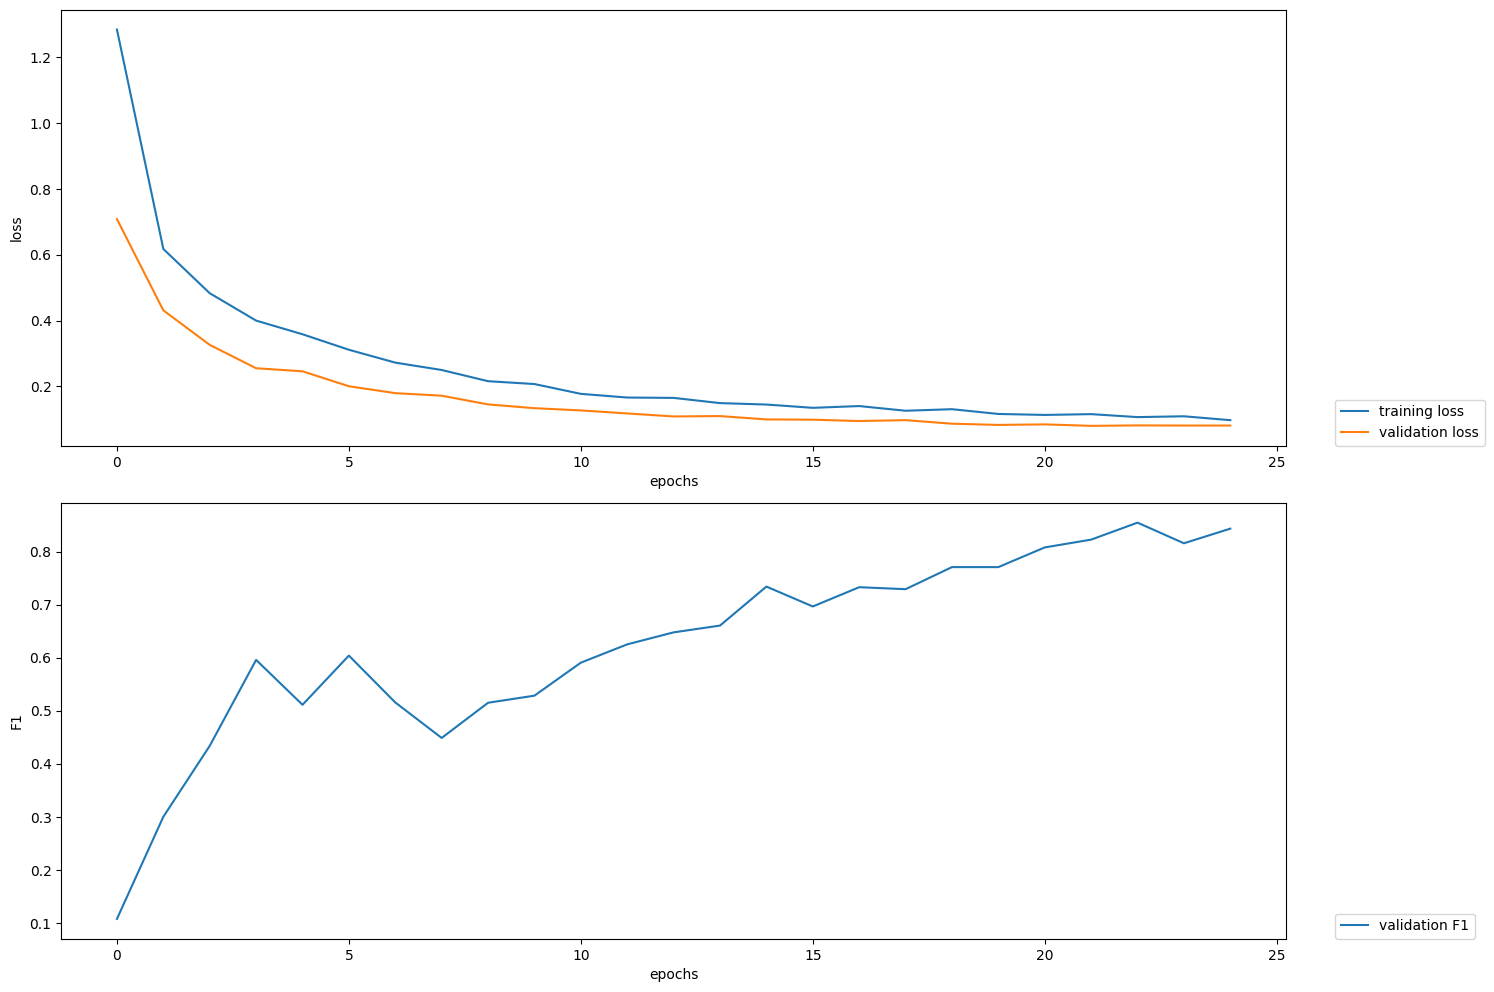

2023-11-23 12:56:51,660 Weights plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-FR/Flair-manual-FR/Flair-manual-model-FR-MT/weights.png


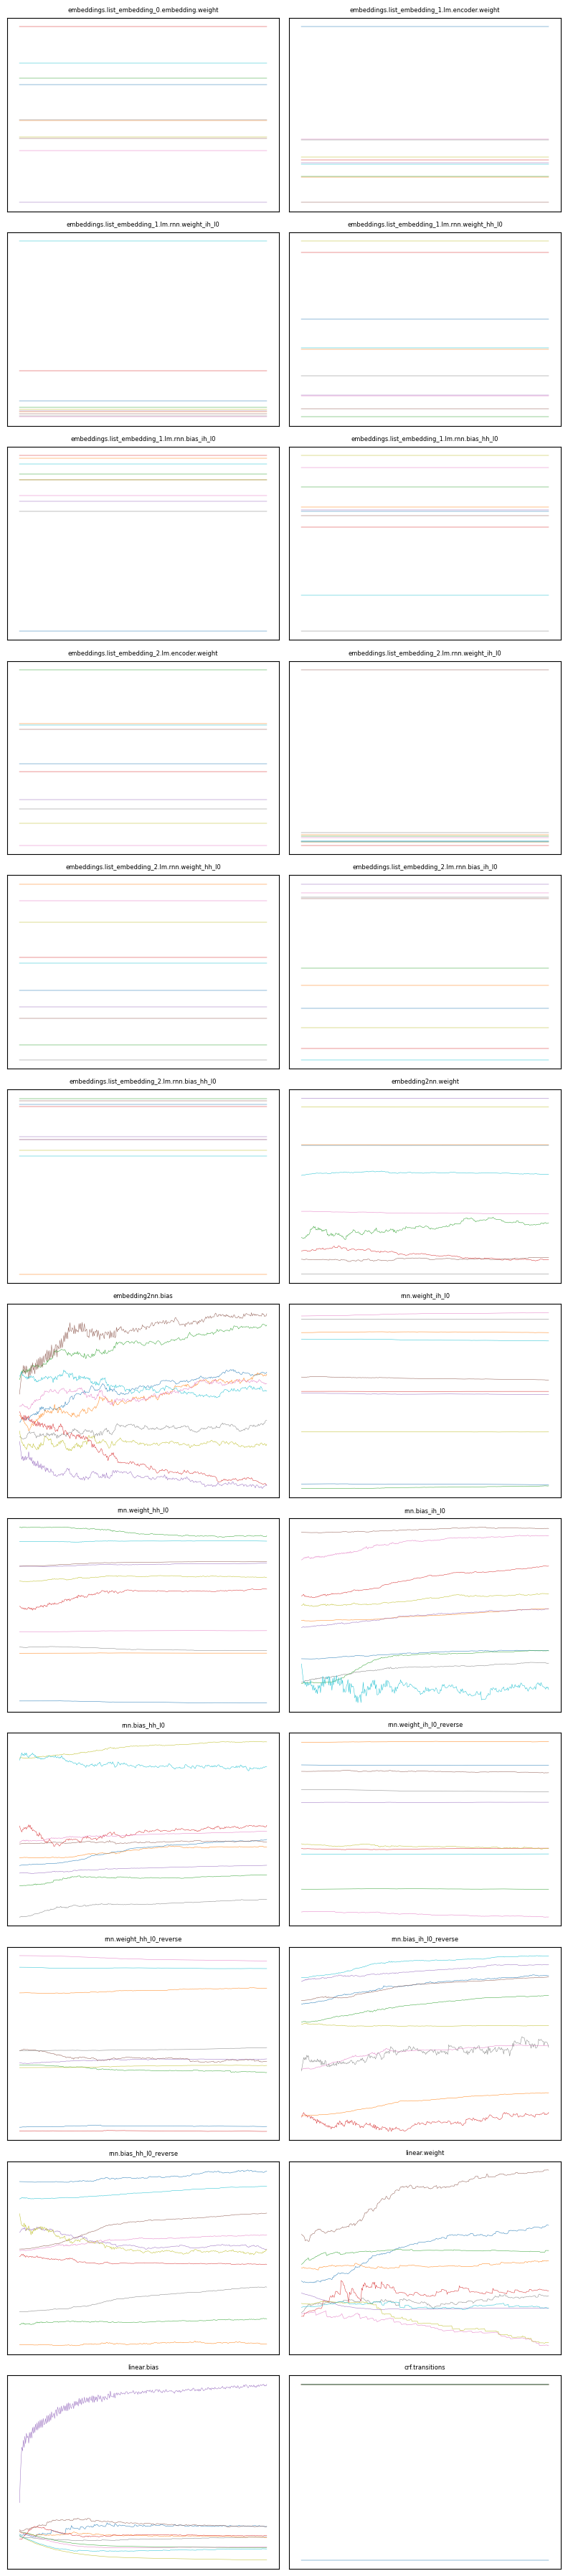

In [ ]:
# plot training loss and weights
# Check documentation on training models with Flair

from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/.../loss.tsv')
plotter.plot_weights('/content/drive/MyDrive/.../weights.txt')